In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import simps
from Ev_Search import ML
from Ev_Search.loaders import filter_data
import numpy as np
import operator
import pandas as pd

import Tools_For_Anal as A

In [ ]:

#sl, n = .10, 1000

#fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
#top_feats = A.get_sorted_labels(fc, n)

#top_feats += ['score']

#train = pd.read_csv('BMI_data.csv')[top_feats]
#val = pd.read_csv('BMI_val_data.csv')[top_feats]

#train.to_csv('BMI_data.csv', index=False)
#val.to_csv('BMI_val_data.csv', index=False)

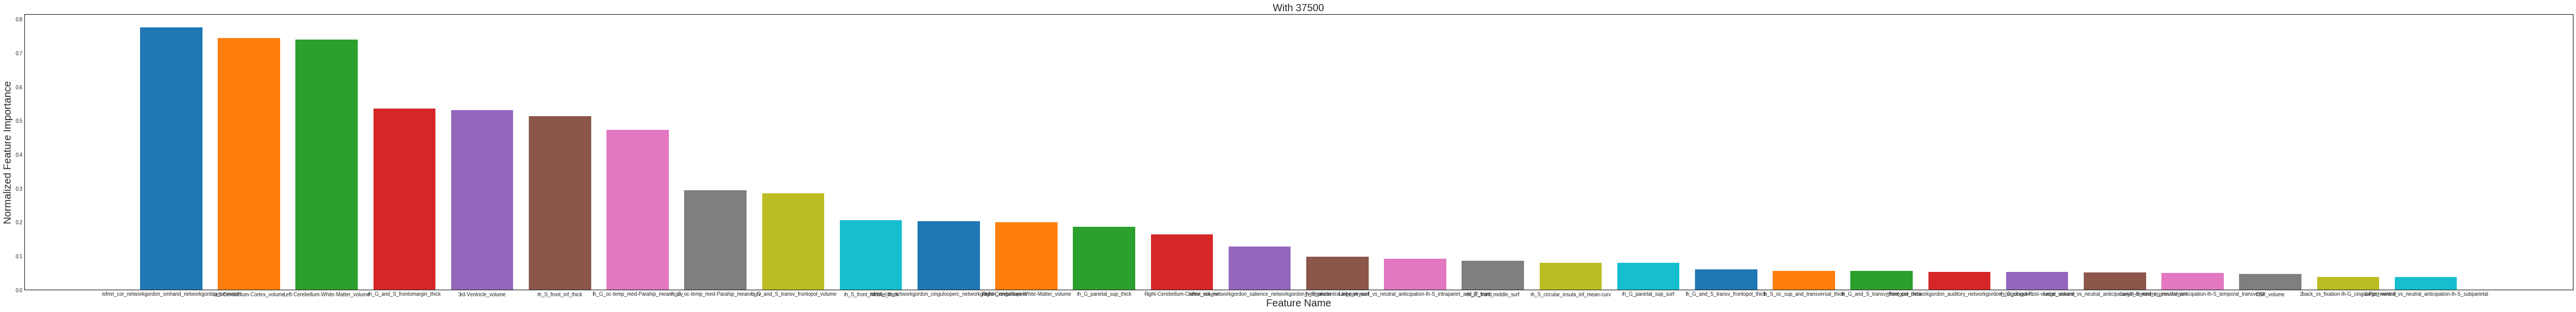

In [5]:
items = A.load_file('Stats/BMI_all_keys.txt')
fc, feat_count = A.get_weighted_feature_counts(items, score_lim=-5)
A.plot_feat_importance(fc, 'With ' + str(feat_count), top=30, print_scores=False, save=False)

In [17]:
sl, n = 0, 50
fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
top_feats = A.get_sorted_labels(fc, n)

X,y,X_val,y_val = A.load_saved('BMI_data.csv', 'BMI_val_data.csv', top_feats)
tr_score = ML.evaluate_regression_model(X, y, model_type=['elastic cv', 'full lightgbm'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['elastic cv', 'full lightgbm'], int_cv=3, metric='r2', target_transform=None)
tr_score[0], val_score

(0.12550632596930406, 0.13930423618211552)

In [18]:
sl, n = 0, 50
fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
top_feats = A.get_sorted_labels(fc, n)

X,y,X_val,y_val = A.load_saved('BMI_data.csv', 'BMI_val_data.csv', top_feats)
tr_score = ML.evaluate_regression_model(X, y, model_type=['full lightgbm'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['full lightgbm'], int_cv=3, metric='r2', target_transform=None)
tr_score[0], val_score

(0.0946744502369994, 0.11477478438824718)

In [20]:
sl, n = 0, 100
fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
top_feats = A.get_sorted_labels(fc, n)

X,y,X_val,y_val = A.load_saved('BMI_data.csv', 'BMI_val_data.csv', top_feats)
tr_score = ML.evaluate_regression_model(X, y, model_type=['full lightgbm'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['full lightgbm'], int_cv=3, metric='r2', target_transform=None)
tr_score[0], val_score

(0.10918418895391493, 0.12021387112118143)

In [21]:
sl, n = 0, 200
fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
top_feats = A.get_sorted_labels(fc, n)

X,y,X_val,y_val = A.load_saved('BMI_data.csv', 'BMI_val_data.csv', top_feats)
tr_score = ML.evaluate_regression_model(X, y, model_type=['full lightgbm'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['full lightgbm'], int_cv=3, metric='r2', target_transform=None)
tr_score[0], val_score

(0.10657762779731916, 0.11040783051030212)

In [22]:
sl, n = 0, 300
fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
top_feats = A.get_sorted_labels(fc, n)

X,y,X_val,y_val = A.load_saved('BMI_data.csv', 'BMI_val_data.csv', top_feats)
tr_score = ML.evaluate_regression_model(X, y, model_type=['full lightgbm'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['full lightgbm'], int_cv=3, metric='r2', target_transform=None)
tr_score[0], val_score

(0.09904186205896809, 0.11439789370861353)

In [ ]:
sl, n = .10, 500
fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
top_feats = A.get_sorted_labels(fc, n)

In [ ]:
tr_score = ML.evaluate_regression_model(X, y, model_type=['elastic cv', 'linear', 'full lightgbm'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['elastic cv', 'linear', 'full lightgbm'], int_cv=3, metric='r2', target_transform=None)
print('ensemble', tr_score[0], val_score)

In [ ]:
score_lims = [.075, .1, .11]
top_nums = [5, 8, 10, 20, 30, 50, 80, 100, 200, 300, 400, 500]

for sl in score_lims:
    fc, feat_count = get_weighted_feature_counts(items, score_lim=sl)
    
    for n in top_nums:
        top_feats = get_sorted_labels(fc, n)

        train = filter_data(pd.read_csv('BMI_data.csv'), i_keys=top_feats)
        val = filter_data(pd.read_csv('BMI_val_data.csv'), i_keys=top_feats)
        X,y = np.array(train.drop('score', axis=1)), np.array(train.score)
        X_val,y_val = np.array(val.drop('score', axis=1)), np.array(val.score)

        tr_score = ML.evaluate_regression_model(X, y, model_type='elastic cv', n_splits=3, n_repeats=2, int_cv=3, metric='r2', target_transform=None)
        val_score = ML.test_regression_model(X, y, X_val, y_val, model_type='elastic cv', int_cv=3, metric='r2', target_transform=None)
        print(sl, n, 'elastic', tr_score[0], val_score)

In [ ]:
sl, n = .11, 300
fc, feat_count = get_weighted_feature_counts(items, score_lim=sl)
top_feats = get_sorted_labels(fc, n)

train = filter_data(pd.read_csv('BMI_data.csv'), i_keys=top_feats)
val = filter_data(pd.read_csv('BMI_val_data.csv'), i_keys=top_feats)
X,y = np.array(train.drop('score', axis=1)), np.array(train.score)
X_val,y_val = np.array(val.drop('score', axis=1)), np.array(val.score)

tr_score = ML.evaluate_regression_model(X, y, model_type='full lightgbm', n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type='full lightgbm', int_cv=3, metric='r2', target_transform=None)
print(sl, n, 'full light gbm', tr_score[0], val_score)

In [ ]:
train = filter_data(pd.read_csv('Stats/BMI_data.csv'), i_keys=None)
val = filter_data(pd.read_csv('Stats/BMI_val_data.csv'), i_keys=None)
X,y = np.array(train.drop('score', axis=1)), np.array(train.score)
X_val,y_val = np.array(val.drop('score', axis=1)), np.array(val.score)

#tr_score = ML.evaluate_regression_model(X, y, model_type='full lightgbm', n_splits=3, n_repeats=2, int_cv=3, metric='r2')
#val_score = ML.test_regression_model(X, y, X_val, y_val, model_type='full lightgbm', int_cv=3, metric='r2', target_transform=None)
#print('full light gbm', tr_score[0], val_score)

In [ ]:
tr_score = ML.evaluate_regression_model(X, y, model_type='elastic cv', n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type='elastic cv', int_cv=3, metric='r2', target_transform=None)
print('full light gbm', tr_score[0], val_score)

In [ ]:
np.mean([[1,2,3], [1,2,3]], axis=0)

In [ ]:
sl, n = .11, 300
fc, feat_count = get_weighted_feature_counts(items, score_lim=sl)
top_feats = get_sorted_labels(fc, n)

train = filter_data(pd.read_csv('Stats/BMI_data.csv'), i_keys=top_feats)
val = filter_data(pd.read_csv('Stats/BMI_val_data.csv'), i_keys=top_feats)
X,y = np.array(train.drop('score', axis=1)), np.array(train.score)
X_val,y_val = np.array(val.drop('score', axis=1)), np.array(val.score)


tr_score = ML.evaluate_regression_model(X, y, model_type=['elastic cv'], n_splits=3, n_repeats=2, int_cv=3, metric='r2')
val_score = ML.test_regression_model(X, y, X_val, y_val, model_type=['elastic cv'], int_cv=3, metric='r2', target_transform=None)
print('ensemble', tr_score[0], val_score)